In [302]:
import numpy as np
import random
import math
import time
import scipy
from scipy import ndimage, misc
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
#example opening images with matplotlib.pyplot
im = plt.imread('banana.jpg')
im2 = plt.imread('banana2.jpg')

#grab red portion of the image
im_red = im.copy()
im_red[:, :, 0] = 0
im_red[:, :, 1] = 0

#turn the rgb image into a gray scale image.
im_gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(im_gray)
plt.show()

(3, 200, 200)


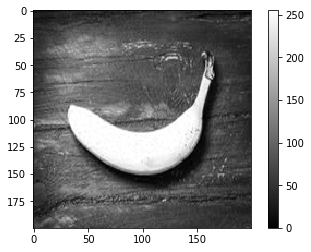

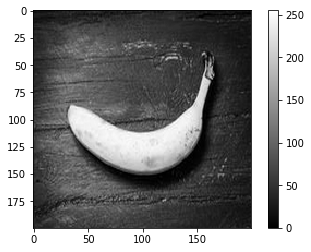

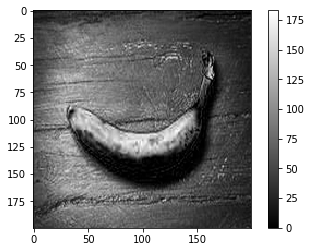

conv_features size: (9, 199, 199)
conv_features size: (9, 199, 199)
conv_features size: (9, 199, 199)


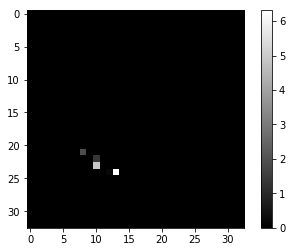

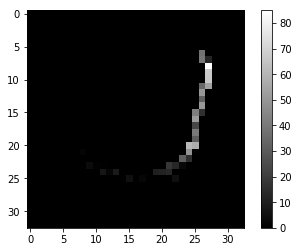

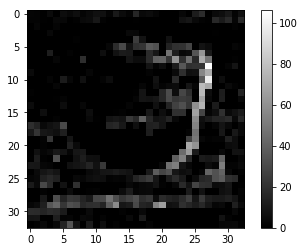

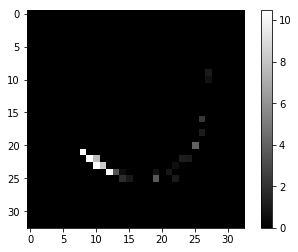

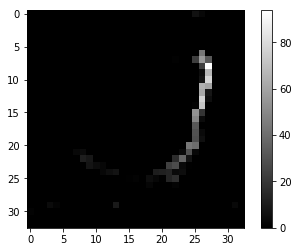

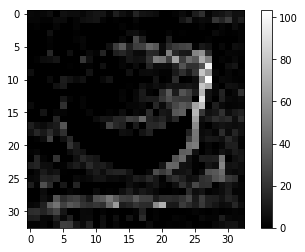

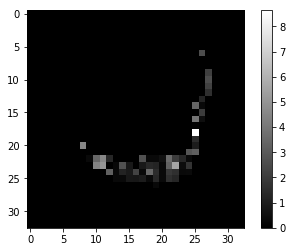

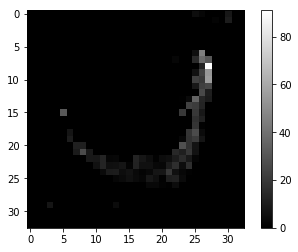

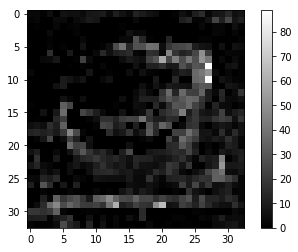

In [510]:
# Using PIL to open image and resize or crop
img = Image.open('banana.jpg')
img2 = Image.open('banana2.jpg')
#crop example
# width, height = img.size
# new_dim = 128
# left = (width - new_dim)/2
# top = (height - new_dim)/2
# right = (width + new_dim)/2
# bottom = (height + new_dim)/2
# img = img.crop((left, top, right, bottom))

# resize example
img = img.resize((200, 200), Image.ANTIALIAS)
img2 = img2.resize((200, 200), Image.ANTIALIAS)
#convert image to numpy array
img_arr = np.array(img)
img2_arr = np.array(img2)

# img_gray = np.dot(img_arr[...,:3], [0.299, 0.587, 0.114])
# img2_gray = np.dot(img2_arr[...,:3], [0.299, 0.587, 0.114])


# putting all the images into an array
image_set = []

for i in range(img_arr.shape[2]):
    image_set.append(img_arr[:,:,i])
image_set = np.asarray(image_set)
print(image_set.shape)

#example for running a single image
# image_set2 = []
# image_set2.append(img_arr)
# image_set2 = np.asarray(image_set2)
# print(image_set2.shape)

for i in range(image_set.shape[0]):
    plt.imshow(image_set[i,:,:])
    plt.colorbar()
    plt.show()

cnn = CNN()
h = cnn.conv_layer(image_set, layer_i=1)
h = cnn.relu_layer(h)
h = cnn.maxpooling_layer(h)
h = cnn.conv_layer(image_set, layer_i=1)
h = cnn.relu_layer(h)
h = cnn.maxpooling_layer(h,(3,3))
h = cnn.conv_layer(image_set, layer_i=1)
h = cnn.relu_layer(h)
h = cnn.maxpooling_layer(h, (6,6))

for i in range(h.shape[0]):
    plt.imshow(h[i, :, :])
    plt.colorbar()
    plt.show()


In [506]:
class CNN:
    def __init__(self):
        self.layers = []
        
        
    def init_weights(self, depth, size):
        weights = []
        for i in range(depth):
            weights.append(np.random.randn(size, size))
        return np.asarray(weights);
    
    def load_weights(self, weights):
        assert not self.layers, "Feature Weights can only be loaded once"
        for i in weights["keys"]:
            self.layers['layer_{}'.format(i)] = weights['layer_{}'.format(i)]
    
    def conv_layer(self, image_set, layer_i=0, depth=3, filter_size=2, stride=1):
        num_images = image_set.shape[0]
        old_width = image_set.shape[1]
        old_height = image_set.shape[2]
        #this is the rgb layers
        #channels = image_set.shape[3]

        padding = 0
        
        # create weights and biases for this layer (need to add conditional for if these are created already or not)
        features = np.random.randn(depth, filter_size, filter_size)
#         self.layers['layer_{}'.format(layer_i)]['weights'] = features
        biases = np.random.rand(depth, 1)
#         self.layers['layer_{}'.format(layer_i)]['biases'] = np.random.rand(depth, 1)

        # calculates the conv output width and height
        output_width = int((old_width - filter_size + 2*padding)/stride + 1)
        output_height = int((old_height - filter_size + 2*padding)/stride + 1)

        # creates the feature matrix
        conv_features = []
        for image_n in range(num_images):
            for feature_i in range(depth):
                conv_image = np.zeros((output_width*output_height))

                col = 0
                row = 0
                for i in range(output_width*output_height):
                    output_pixel = np.sum(image_set[image_n,row:filter_size+row, col:filter_size+col]*features[feature_i])
                    bias = biases[feature_i]
                    conv_image[i] = output_pixel + bias
                    col += stride

                    if(filter_size + col)-stride >= old_width:
                        col = 0
                        row += stride

                conv_image = conv_image.reshape((output_width, output_height))
                conv_features.append(conv_image)
        conv_features = np.asarray(conv_features)
        print('conv_features size:', conv_features.shape)
                
        return conv_features
                    
    
    def relu_layer(self, image_set):
#         z = np.zeros_like(image_set)
#         return np.where(x>z, x, z)
        return np.maximum(0, image_set)

    def maxpooling_layer(self, image_set, poolsize = (2,2)):
        depth = image_set.shape[0]
        width = image_set.shape[1]
        height = image_set.shape[2]
        #poolsize[0] is the filter size, poolsize[1] is the stride size
        output_x = int((width - poolsize[0])/poolsize[1] + 1)
        output_y = int((height - poolsize[0])/poolsize[1] + 1)

        output = np.zeros((depth, output_y, output_x))
        for i in range(depth):
            for j in range(output_y):
                row_start = j * poolsize[0]
                row_end = row_start + poolsize[0]
                for h in range(output_x):
                    col_start = h * poolsize[0]
                    col_end = col_start + poolsize[0]

                    sectionToPool = image_set[i][row_start:row_end, col_start:col_end]

                    max_val = np.amax(sectionToPool)
                    output[i][j][h] = max_val

        return output
    


#     def maxpool_layer(self, )